<a href="https://colab.research.google.com/github/Sidra-memon/Multiple-Linear-Regression-for-Sales-Prediction/blob/main/Linear_Regression_on_bigMart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal: Implement Multiple Linear Regression model for the given data to predict
sales**\
**Steps:**

**1.  Import all the Required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**2. Read the dataset**

In [ ]:
df=pd.read_csv('/content/BigMartData.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**3. Perform EDA**


* Check the non-null counts, column datatypes, total rows and total columns
*   Check the statistical information of all columns
*   Check Unique values and value counts of each categorical columns
*   Check and remove duplicate values
*   Heatmap of all numerical features to check correlations


In [ ]:
#Check the non-null counts, column datatypes, total rows and total columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
len(df)


8523

In [ ]:
len(df.columns)

12

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
#Check the statistical information of all columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Check Unique values and value counts of each categorical columns
df.describe(include=["O"])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


<Axes: >

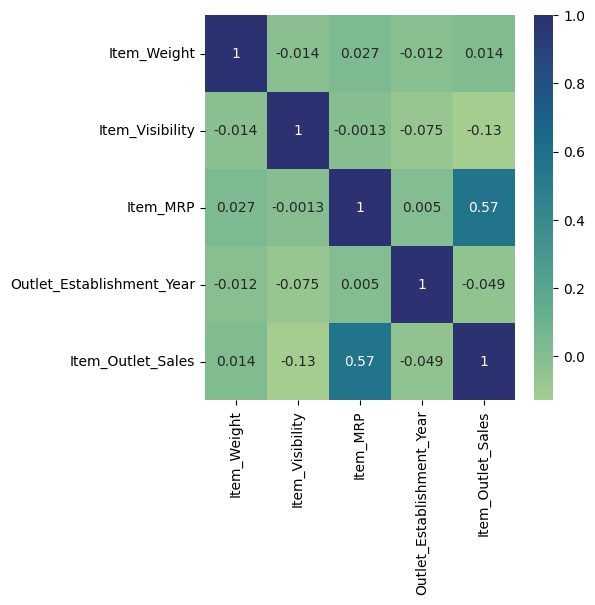

In [ ]:
#### Visualizing correlation
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')

**Interpretation from Heatmap**
1. Item_MRP is positively correlated with Item_Outlet_Sales, suggesting it might strongly influence sales.
2.  Item_Visibility has a weak negative impact on Item_Outlet_Sales, which could indicate that items with higher visibility don't always sell better.

1.   Other variables, such as Item_Weight,item visibility and Outlet_Establishment_Year, show minimal correlation with Item_Outlet_Sales.





**Imputing missing values in Item weight and Outlet size**\
Since Item weight is related with the item identifier, we can check similiar item_identifier and fill the missing values in Item's weight column.

In [ ]:
unique_products = df['Item_Identifier'].unique()
unique_products

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
product_weight = df.groupby('Item_Identifier')['Item_Weight'].unique()
product_weight

,Item_Weight
Item_Identifier,
DRA12,[11.6]
DRA24,"[19.35, nan]"
DRA59,"[8.27, nan]"
DRB01,"[7.39, nan]"
DRB13,[6.115]
...,...
NCZ30,"[6.59, nan]"
NCZ41,[19.85]
NCZ42,[10.5]


In [ ]:
# Replace missing 'Item weight' values with the corresponding value from weights
for product in unique_products:
        weight = product_weight[product][0]  # Access the first element (price)
        df.loc[(df['Item_Identifier'] == product) & (df['Item_Weight'].isna()), 'Item_Weight'] = weight


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,354
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**Mostly missing values from Item weights are imputed with above methed now we can see remainig 354 missing value are Nan**

---



In [ ]:
df['Item_Weight'].isna().sum()

354

In [ ]:
df['Outlet_Size'].isna().sum()


2410

**From the above results we can see Outlet_Size and Item_Weight have only nan values which can be imputed with simple imputer**

**We can check the catagories in Outlet_Size column and its count so we can impute and encode the column better way**

In [ ]:
unique_products = df['Outlet_Size'].unique()
unique_products

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


**We can conclude from the results that NaN values in Outlet_Size column can be imputed with most frequent Medium size and can be encoded with ordinal encoding**

**4. Split the features and target variable**

*   Remove any unnecessary features






In [ ]:
# Drop unnecessary columns
un_df = df.drop(columns=['Item_Fat_Content', 'Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Item_Type']) # Specify columns to drop
un_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,1999,Medium,3735.1380
1,DRC01,5.92,0.019278,48.2692,2009,Medium,443.4228
2,FDN15,17.50,0.016760,141.6180,1999,Medium,2097.2700
3,FDX07,19.20,0.000000,182.0950,1998,NaN,732.3800
4,NCD19,8.93,0.000000,53.8614,1987,High,994.7052


In [ ]:
#Split the features and target variable
#Remove any unnecessary features
input_data_X = un_df.drop('Item_Outlet_Sales', axis=1)

labels_Y = un_df['Item_Outlet_Sales']

In [ ]:
input_data_X.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size
0,FDA15,9.30,0.016047,249.8092,1999,Medium
1,DRC01,5.92,0.019278,48.2692,2009,Medium
2,FDN15,17.50,0.016760,141.6180,1999,Medium


In [ ]:
labels_Y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [ ]:
num_feats = input_data_X.drop(['Item_Identifier','Outlet_Size'], axis=1)
cat_feats = input_data_X[['Item_Identifier','Outlet_Size']]
num_feats.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


**5. Creating Data Preprocessing Pipelines on features subset**
*   Separate the numerical features and categorical features
*   Create the numerical pipeline along with imputation for missing values
*   Create the categorical pipeline along with imputation for missing values
*   Combine pipelines into a ColumnTransformer
*   Fit and transform the data


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Numerical pipeline
steps_num = [('imputer', SimpleImputer(strategy='mean')),
             ('scaler', StandardScaler())]
num_feats_pipe = Pipeline(steps_num)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Categorical pipeline
steps_cat = [('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())]

cat_feats_pipe = Pipeline(steps_cat)

In [ ]:
# Combine pipelines
# Combine pipelines
num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_feats_pipe, num_list),
    ('cat', cat_feats_pipe, cat_list)
])

# Fit and transform the data
training_data_preprocessed = final_pipe.fit_transform(input_data_X)

In [ ]:
# Fit and transform the data
training_data_preprocessed = final_pipe.fit_transform(input_data_X)

# Convert the sparse matrix to a dense array
training_data_preprocessed = training_data_preprocessed.toarray()  # Add this line

# Get the column names after preprocessing
encoded_cat_features = final_pipe.named_transformers_['cat']['encoder'].get_feature_names_out(cat_list)
all_features = num_list + list(encoded_cat_features)
training_data_preprocessed_df = pd.DataFrame(training_data_preprocessed, columns=all_features)

# Display the first few rows
training_data_preprocessed_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,-0.787951,-0.970732,1.747454,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.532198,-0.908111,-1.489023,1.334103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.017618,-0.956917,0.010040,0.139541,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.391943,-1.281758,0.660050,0.020085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.869422,-1.281758,-1.399220,-1.293934,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Visualize Pipeline - Concluded here
from sklearn import set_config
set_config(display='diagram')
final_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['Item_Identifier', 'Outlet_Size'])])

**6. Split the Train and Test Sets**
*   First keep 20% for testing

In [ ]:
#Splitting testdata into X_train,X_test,y_train,y_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(training_data_preprocessed_df,labels_Y,test_size=.20,random_state=7)

**7. Fit & Predict the Linear Regression Model**\
**8. Evaluate the Model performance using MSE and R2 score**


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # coefficents, intercept

# Predict on the test set
y_pred_lr = lr_model.predict(X_test) # targets are not provided w0x0+w1x1+w2x2 + b = price

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression\nMSE: {mse_lr}\nR2: {r2_lr}")

Linear Regression
MSE: 2437436.14745364
R2: 0.21201408628443008


# **Conculsion**
**MSE=2437436.15**, which is relatively large. However, the size of the MSE depends on the scale of the target variable. As target values are in the millions, this might not be too bad.
we can see from statistics provided for Sales:

* Min: 33.29
* Max: 13,086.96
* Mean: 2,181.29

The sales values have a wide range, and the mean is relatively high. A large MSE is expected when the target variable has a large range and variance.

**R2** ranges from 0 to 1. Higher values indicate a better fit. In our case **R2=0.212** means that our model explains about 21.2% of the variance in the target variable.
This suggests that the model is not very good at capturing the patterns in the data, leaving room for improvement.

